{'xopt': array([-3.77931022,  1.69143366]), 'yopt': 87.44730128708954, 'num_iter': 3, 'initial_point': array([0, 5])}


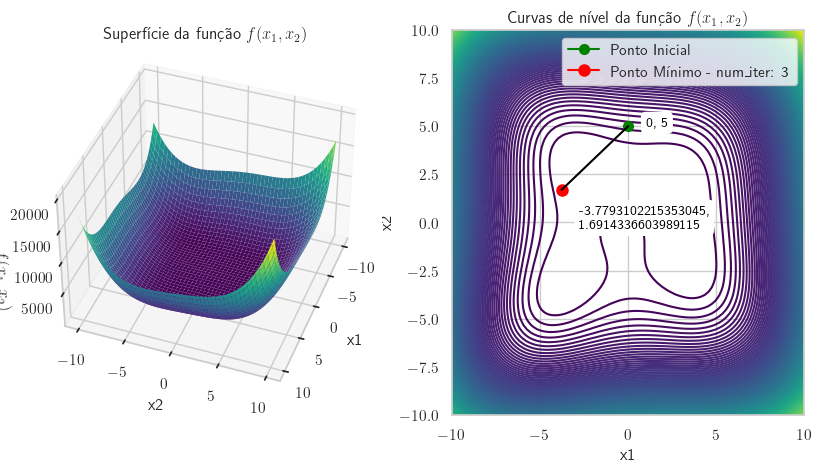

{'xopt': array([-2.80511809,  3.13131251]), 'fopt': 3.8271493203628255e-15, 'num_iter': 5, 'initial_point': array([0, 5])}


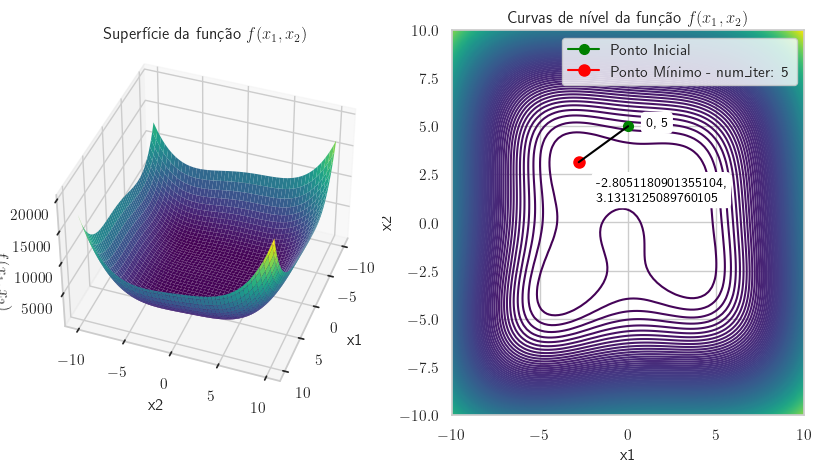

{'xopt': array([-2.80511806,  3.13131254]), 'fopt': 3.799214169559782e-14, 'num_iter': 37, 'initial_point': array([0, 5])}


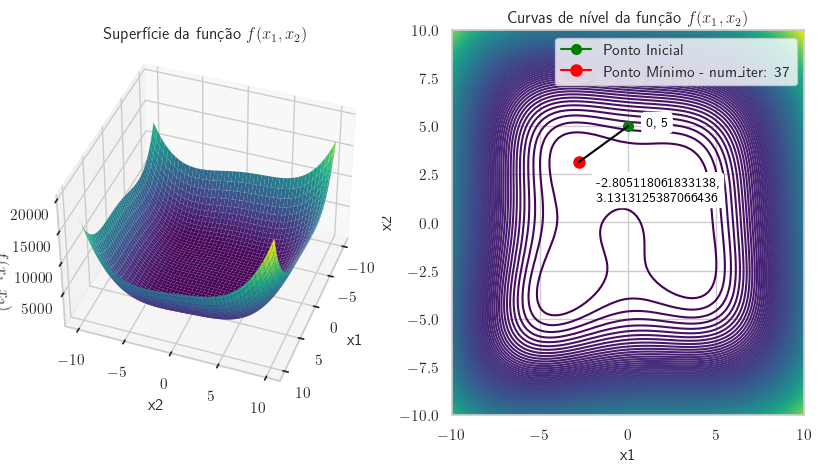

In [1]:
import numpy as np
from scipy.optimize import minimize

import sys
sys.path.append('../')

from pyopt.optim import powell, steepest_descent, bfgs
from pyopt.plots import plot_optimization


def func(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

x0 = np.array([0, 5])
d = np.array([3, 1.5])


for method in [powell, steepest_descent, bfgs]:
    res = method(func, x0)
    print(res)

    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    plot_optimization(X, Y, Z, res)

In [3]:
import numpy as np

def compute_gradient(func, x, epsilon=1e-6):
    """
    Compute the gradient of a scalar function using finite differences.

    Parameters:
    func : callable
        The objective function to compute the gradient for.
    x : ndarray
        The point at which to compute the gradient.
    epsilon : float, optional
        A small value for the finite difference.

    Returns:
    gradient : ndarray
        The gradient vector at the given point x.
    """
    n = len(x)
    gradient = np.zeros(n)
    
    for i in range(n):
        x_plus = x.copy()
        x_minus = x.copy()
        
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        
        gradient[i] = (func(x_plus) - func(x_minus)) / (2 * epsilon)
    
    return gradient

# Example usage:
def func(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

initial_point = np.array([1.0, 2.0])
gradient = compute_gradient(func, initial_point)
print(gradient)


[-36. -32.]
